# Introduction to machine learning using sci kit learn
![Machine Learning](
https://imgs.xkcd.com/comics/machine_learning.png)

In [100]:

from six.moves import urllib
# UTIL for fetching mnist dataset
from sklearn.datasets import fetch_mldata
# so we can have plots
import matplotlib
import matplotlib.pyplot as plt

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals


import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# A basic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier


x = [[0., 0.], [1., 1.], [2., 2.]]
Y = [0, 1, 2]

# Basic SK Learn classifier
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
clf = SGDClassifier(loss="hinge", penalty="l2")
# Train the sklean model
clf.fit(x, Y)

# Predict an output
print(clf.predict([[1.1, 1.1]]))
print(clf.predict([[1.9, 1.9]]))

[1]
[2]


![gradient descent](
https://www.cs.toronto.edu/~frossard/post/linear_regression/sgd.gif)

In [81]:
# fetch the data
mnist = fetch_mldata('MNIST original')

# x -> features which is pixel array, y -> labeled outputs
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

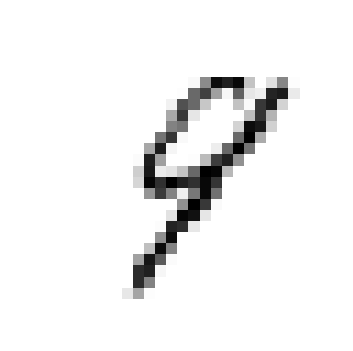

In [73]:
def plot_digit(data):
    #reshape the image and plot it so we can have a good vis of what we are working with.
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

#grab a digit out of the array and plot it
some_digit_index = 69000
some_digit = X[some_digit_index]
plot_digit(some_digit)
plt.show()

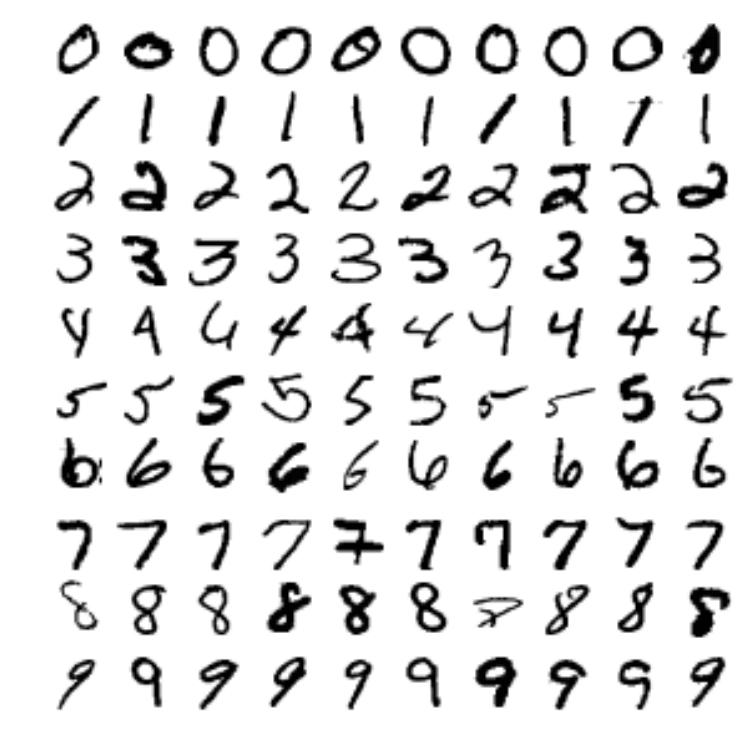

In [13]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

# Split the data into a training set, and a test set

In [56]:
from sklearn.model_selection import train_test_split

# Here we split our data set into testing and training sets, this allows us the ability to 
# test how our model generalizes on data it has never seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Overfitting vs UnderFittng
![img](
http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

# Create a Decision Tree Classifer

In [59]:
# cross validation set for getting a validation set and testing our model.
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

# http://scikit-learn.org/stable/modules/tree.html
decision_tree_clf = DecisionTreeClassifier()

# Train the machine learning algorithm
# SCI Kit Learn algorithms all the use the same interface
decision_tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Measure how well our classifier did and peek at some incorrect predicitons

[ 0.86207592  0.86144305  0.8587998 ]
PREDICTED
2.0
ACTUAL
6.0


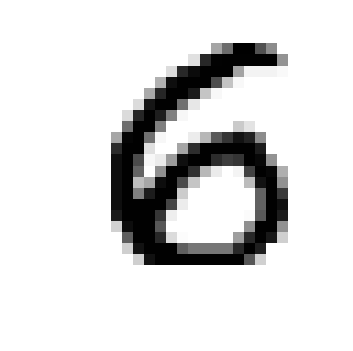

PREDICTED
8.0
ACTUAL
0.0


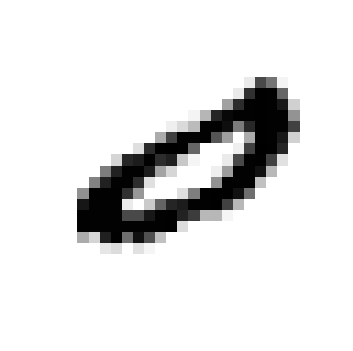

PREDICTED
4.0
ACTUAL
2.0


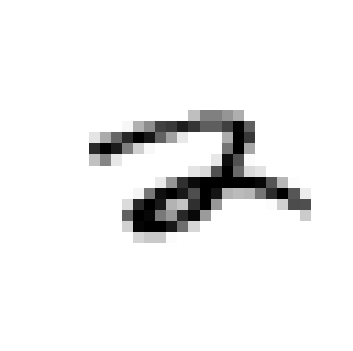

PREDICTED
4.0
ACTUAL
0.0


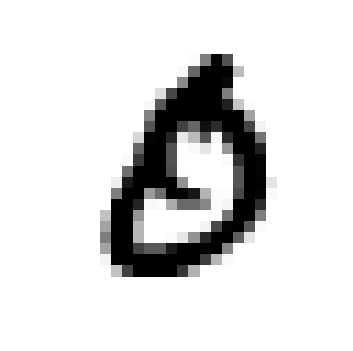

PREDICTED
2.0
ACTUAL
9.0


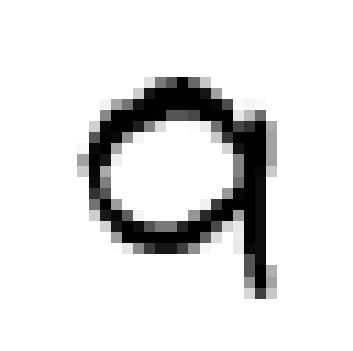

PREDICTED
3.0
ACTUAL
8.0


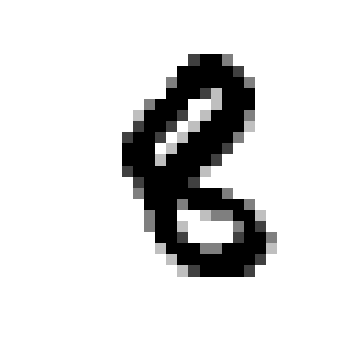

PREDICTED
9.0
ACTUAL
4.0


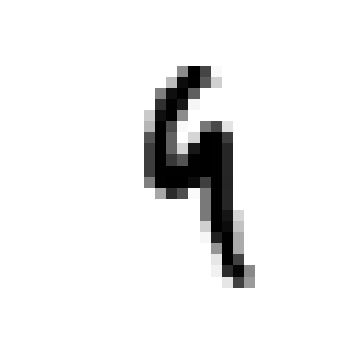

PREDICTED
6.0
ACTUAL
1.0


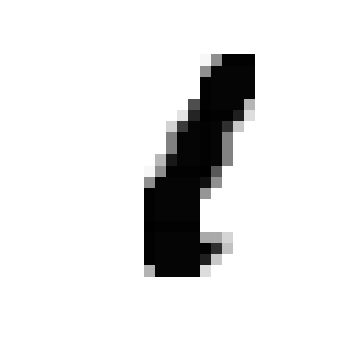

PREDICTED
7.0
ACTUAL
6.0


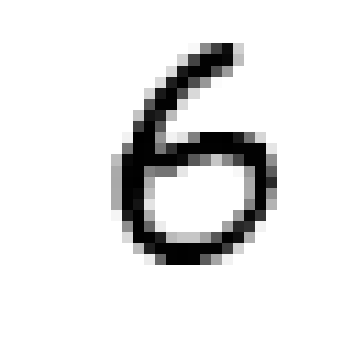

PREDICTED
9.0
ACTUAL
8.0


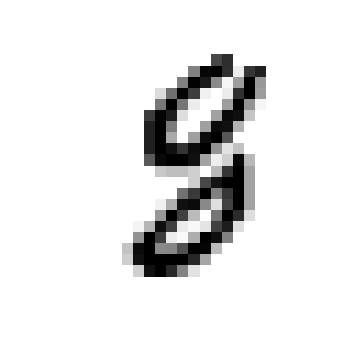

0.876


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print(decision_tree_clf._score)

# split the data into differen subsections and do a train test cycle on each section of the data
print(cross_val_score(decision_tree_clf, X_train, y_train, scoring="accuracy"))

# pass in an array of 
y_test_pred = decision_tree_clf.predict(X_test)


# loop over some incorrect predictions and see what the classifier did wrong.
count = 0
for i in range(len(y_test_pred)):
    if y_test_pred[i] != y_test[i]:
        count = count + 1
        if count >= 11:
            break
        print("PREDICTED")
        print(y_test_pred[i])
        print("ACTUAL")
        print(y_test[i])
        plot_digit(X_test[i])
        plt.show()

print(accuracy_score(y_test, y_test_pred))

# K Nearest Neighbors Classifer
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_clf = KNeighborsClassifier(n_jobs=-1)

# use the sklearn interface to train the classifier
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

# Measure accuracy of our KNN Classifier


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# generate all the outputs for the test data set
y_test_pred = knn_clf.predict(X_test)

# Get the accuracy score
print(accuracy_score(y_test, y_test_pred))

0.980380952381


In [68]:
# Import grid search
from sklearn.model_selection import GridSearchCV

# Hyper Parameter inputs that Grid Search will run over
parameters = {'weights':('uniform', 'distance')}

# Create the classifier
knn = KNeighborsClassifier(n_jobs=-1)

# Wrap the classifer in grid search
clf = GridSearchCV(knn, parameters)

# Train the classifier, this will go through each grid search
clf.fit(X_train, y_train)

# We can then get the best estimator from the grid search and generate predictions
y_test_pred = clf.best_estimator_.predict(X_test)


# Print the accuracy of the classifier
print(accuracy_score(y_test, y_test_pred))

0.973428571429


# Ensemble Learning with Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier


random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)


y_test_pred = random_forest_clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

0.947333333333


# Deep Learning, Neural Networks, And Keras

In [108]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier


# Deep neural network
def make_model(dense_layer_sizes, filters, kernel_size, pool_size, shape):
    '''Creates model comprised of 2 convolutional layers followed by dense layers
    dense_layer_sizes: List of layer sizes.
        This list has one number for each layer
    filters: Number of convolutional filters in each convolutional layer
    kernel_size: Convolutional kernel size
    pool_size: Size of pooling area for max pooling
    '''

    model = Sequential()
    model.add(Conv2D(filters, kernel_size,
                     padding='valid',
                     input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    return model


nn_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
nn_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
keras_clf = KerasClassifier(
                           make_model, 
                           batch_size=128, dense_layer_sizes=[128],
                           epochs=10,
                           filters=32,
                           kernel_size=(3, 3),
                           pool_size=(2,2),
                           shape=nn_train.shape
                        )
keras_clf.fit(nn_train, y_train)

y_test_pred = keras_clf.predict(nn_test)
print("\n")

print(accuracy_score(y_test, y_test_pred))


Epoch 1/10
59500/59500 [==============================] - 66s - loss: 2.2624 - acc: 0.7138    
Epoch 2/10
59500/59500 [==============================] - 75s - loss: 0.2732 - acc: 0.9213    
Epoch 3/10
59500/59500 [==============================] - 68s - loss: 0.1663 - acc: 0.9520    
Epoch 4/10
59500/59500 [==============================] - 69s - loss: 0.1266 - acc: 0.9649    
Epoch 5/10
59500/59500 [==============================] - 69s - loss: 0.1009 - acc: 0.9709    
Epoch 6/10
59500/59500 [==============================] - 65s - loss: 0.0878 - acc: 0.9753    
Epoch 7/10
59500/59500 [==============================] - 65s - loss: 0.0771 - acc: 0.9781    
Epoch 8/10
59500/59500 [==============================] - 65s - loss: 0.0700 - acc: 0.9802    
Epoch 9/10
59500/59500 [==============================] - 65s - loss: 0.0618 - acc: 0.9819    
Epoch 10/10
10368/10500 [============================>.] - ETA: 0s

0.989904761905
